<a href="https://colab.research.google.com/github/santolina/Convolutional-Neural-Networks-in-TensorFlow/blob/master/Course_4_S%2BP_Week_4_Lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow==2.0.0b1
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
    -O /tmp/sunspots.csv

--2019-11-26 15:40:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [application/octet-stream]
Saving to: ‘/tmp/sunspots.csv’

/tmp/sunspots.csv   100%[===================>]  69.17K  --.-KB/s    in 0.001s  

2019-11-26 15:40:01 (113 MB/s) - ‘/tmp/sunspots.csv’ saved [70827/70827]



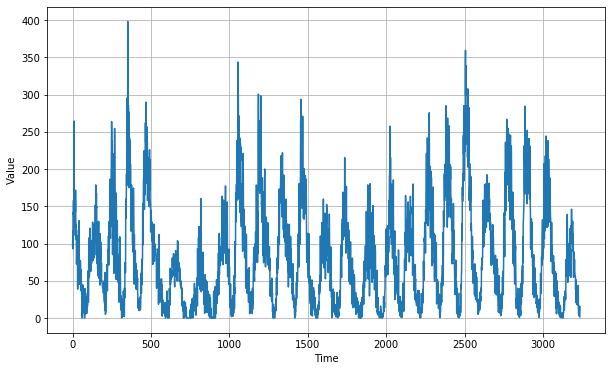

In [5]:
import csv
time_step = []
sunspots = []

with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [0]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 60
batch_size = 32
shuffle_buffer_size = 1000



In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [10]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))
model.fit(dataset,epochs=100,verbose=1)




Epoch 1/100
92/92 [==============================] - 4s 44ms/step - loss: 2182.8474
Epoch 2/100
92/92 [==============================] - 1s 11ms/step - loss: 914.8070
Epoch 3/100
92/92 [==============================] - 1s 11ms/step - loss: 854.7162
Epoch 4/100
92/92 [==============================] - 1s 11ms/step - loss: 822.4472
Epoch 5/100
92/92 [==============================] - 1s 9ms/step - loss: 795.8632
Epoch 6/100
92/92 [==============================] - 1s 9ms/step - loss: 781.1887
Epoch 7/100
92/92 [==============================] - 1s 10ms/step - loss: 770.6513
Epoch 8/100
92/92 [==============================] - 1s 10ms/step - loss: 757.0281
Epoch 9/100
92/92 [==============================] - 1s 10ms/step - loss: 738.0311
Epoch 10/100
92/92 [==============================] - 1s 10ms/step - loss: 722.8067
Epoch 11/100
92/92 [==============================] - 1s 11ms/step - loss: 720.4153
Epoch 12/100
92/92 [==============================] - 1s 10ms/step - loss: 720.8250
Ep

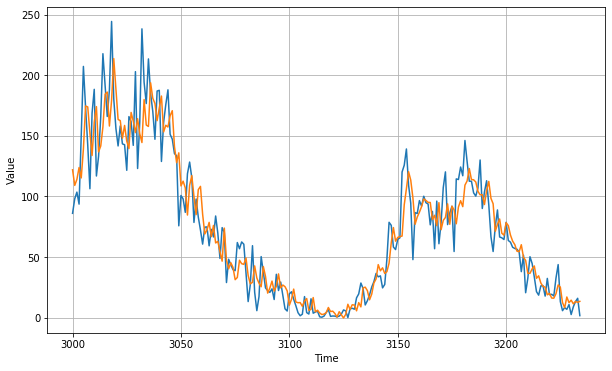

In [11]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [12]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

15.006471

In [14]:
dataset = windowed_dataset(x_train, 356, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[356], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))
model.fit(dataset,epochs=100,verbose=1)




Epoch 1/100
83/83 [==============================] - 2s 25ms/step - loss: 3446.5832
Epoch 2/100
83/83 [==============================] - 2s 23ms/step - loss: 1116.9295
Epoch 3/100
83/83 [==============================] - 1s 16ms/step - loss: 980.8572
Epoch 4/100
83/83 [==============================] - 1s 17ms/step - loss: 888.6538
Epoch 5/100
83/83 [==============================] - 1s 17ms/step - loss: 867.4264
Epoch 6/100
83/83 [==============================] - 1s 18ms/step - loss: 822.8065
Epoch 7/100
83/83 [==============================] - 2s 20ms/step - loss: 787.7955
Epoch 8/100
83/83 [==============================] - 2s 20ms/step - loss: 759.8847
Epoch 9/100
83/83 [==============================] - 2s 19ms/step - loss: 791.7375
Epoch 10/100
83/83 [==============================] - 1s 17ms/step - loss: 726.2204
Epoch 11/100
83/83 [==============================] - 1s 17ms/step - loss: 712.2522
Epoch 12/100
83/83 [==============================] - 1s 17ms/step - loss: 702.2054

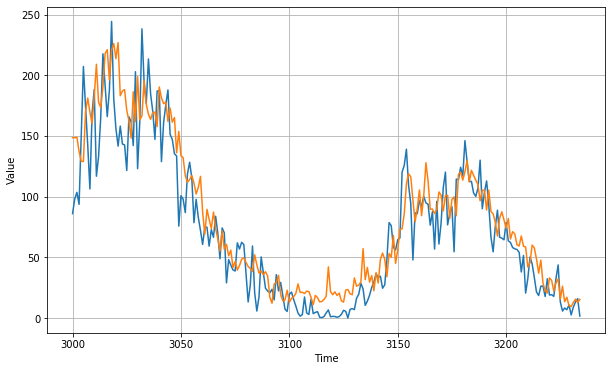

In [15]:
forecast=[]
for time in range(len(series) - 356):
  forecast.append(model.predict(series[time:time + 356][np.newaxis]))

forecast = forecast[split_time - 356:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [16]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

18.809937